In [1]:
from sklearn.model_selection import train_test_split

##### train_test_split
 - *array : feature dataset, label dataset
 - test_size = None
 - train_size = None
 - shuffle = True
 - stratify = None
 - random_state = None
 

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [3]:
import numpy as np

In [4]:
fish_data = np.column_stack((fish_length,fish_weight))

In [5]:
fish_target = [1]*35 + [0] * 14

In [6]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_data,fish_target, random_state = 42)

In [7]:
test_target

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

데이터 분포를 반영

In [8]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_data,fish_target,stratify = fish_target, random_state = 42)

In [9]:
test_target

[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]

### 성능 평가 및 테스트

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [11]:
kn.predict([[25,150]])

array([0])

In [12]:
import matplotlib.pyplot as plt

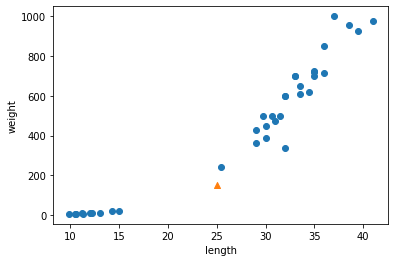

In [13]:
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

테스트할 도미데이터와 이웃하는 데이터들

In [14]:
dist, idx = kn.kneighbors([[25,150]])

In [15]:
train_input[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

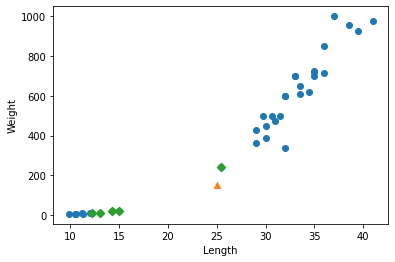

In [16]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker = '^')
plt.scatter(train_input[idx,0], train_input[idx,1], marker = 'D')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

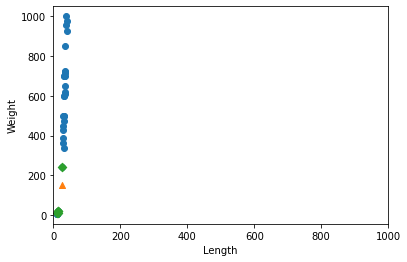

In [17]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker = '^')
plt.scatter(train_input[idx,0], train_input[idx,1], marker = 'D')
plt.xlim((0,1000))
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

두 변수의 스케일을 갖게
- 표준점수(Z-Score)

In [18]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [19]:
train_scaled = (train_input - mean) / std

In [20]:
train_scaled[:5]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528]])

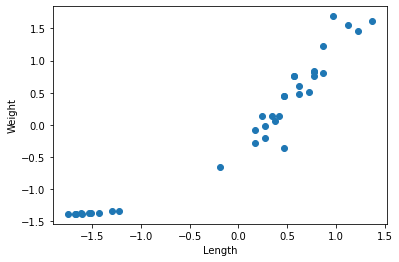

In [21]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

새로운 데이터 확인

In [22]:
new = ([25,150] - mean)/std

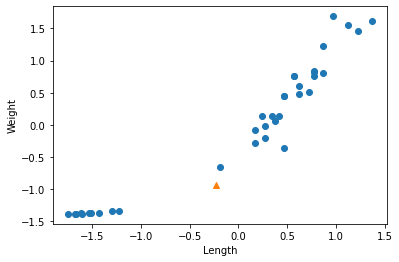

In [23]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [24]:
test_scaled = (test_input - mean)/ std

In [25]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [26]:
kn.score(test_scaled,test_target)

1.0

In [28]:
kn.predict([new])

array([1])

In [30]:
dist, idx = kn.kneighbors([new])

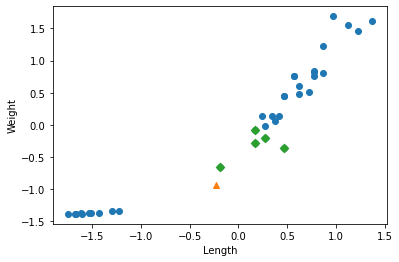

In [34]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[idx, 0], train_scaled[idx,1], marker='D')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()